<img src="https://unal.edu.co/_assets/ca8e1ca9a551c3e3ffc233b30e54ba93/images/escudoUnal.svg" width="800" height="500">

# LABORATORIO 1

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-14


# 4. Simulación de la Localización Binaural







#### Actividades:

##### Se propone justamente descargar o generar un sonido monofónico (un canal) de corta duración y procesarlo para generar una señal de dos canales (estéreo). El propósito del procesamiento debe ser el de generar una sensación de localización de dicho sonido, a partir de la manipulación de sus valores relativos de    

In [19]:
from pydub import AudioSegment
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Carga el archivo MP3
song = AudioSegment.from_mp3("test.mp3")

# Obtén los primeros 5 segundos
first_5_seconds = song[5000:7000]
first_5_seconds.export("recorte_5_segundos.mp3", format="mp3")

# Exporta el audio a un array de bytes en formato WAV para reproducirlo
wave_obj = sa.WaveObject(first_5_seconds.raw_data, num_channels=first_5_seconds.channels, 
                         bytes_per_sample=first_5_seconds.sample_width, sample_rate=first_5_seconds.frame_rate)
play_obj = wave_obj.play()
play_obj.wait_done()  # Espera hasta que el audio haya terminado de reproducirse


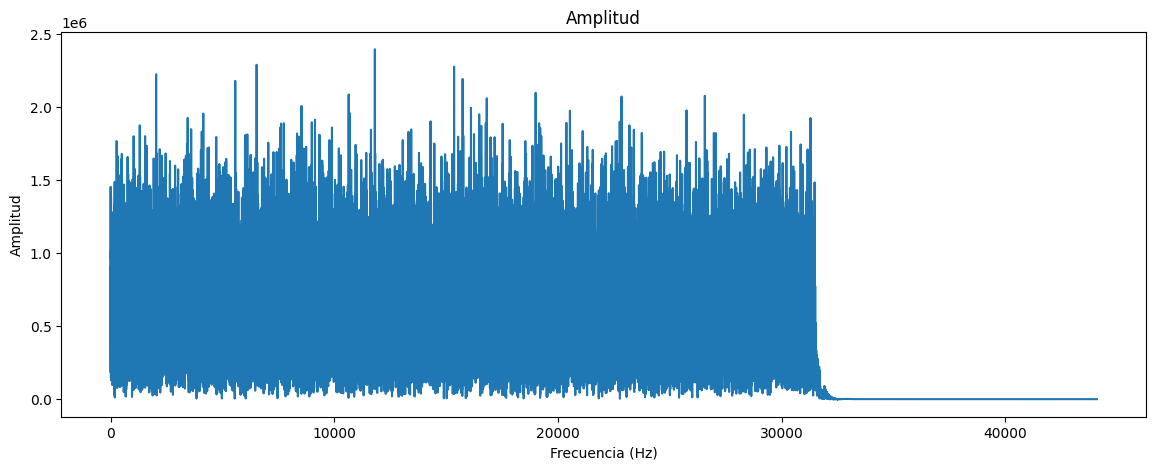

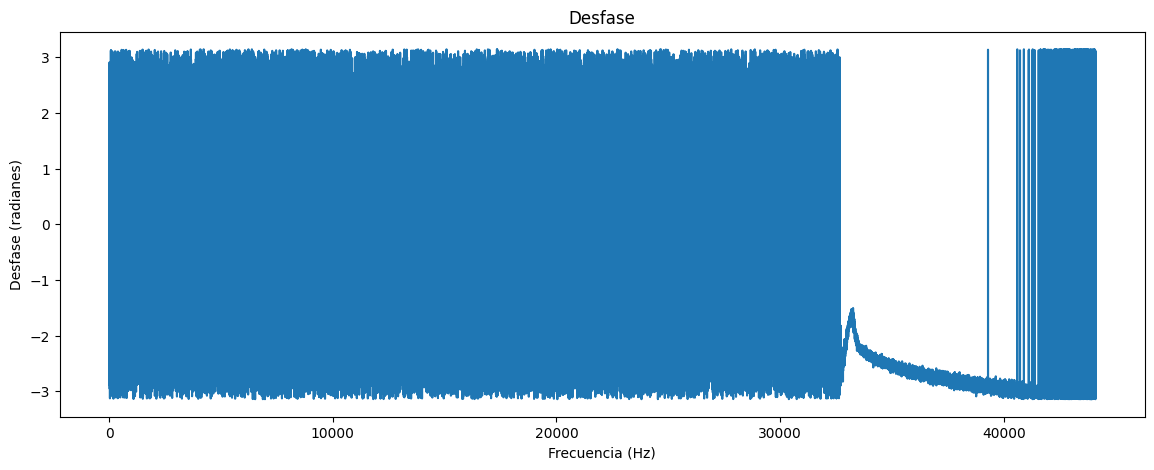

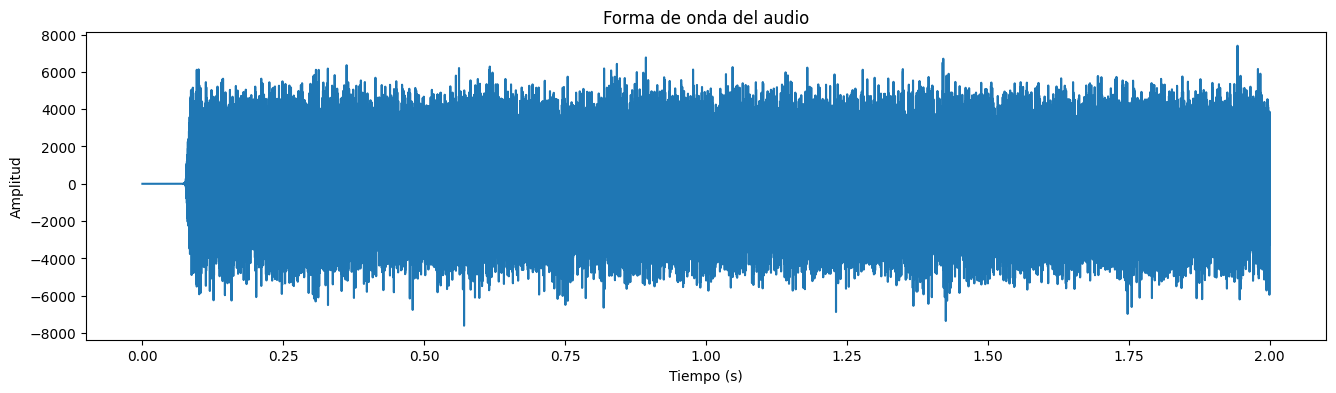

In [20]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Paso 1: Leer el archivo MP3
song = AudioSegment.from_mp3("recorte_5_segundos.mp3")

# Paso 2: Convertir a un array de NumPy (mono para simplificar)
samples = np.array(song.get_array_of_samples())
if song.channels == 2:  # Si es estéreo, convertir a mono
    samples = samples[::2] + samples[1::2] / 2

# Paso 3: Calcular la FFT
fft_result = fft(samples)

# Paso 4: Calcular amplitud y desfase
amplitudes = np.abs(fft_result)
phases = np.angle(fft_result)

# Para graficar la forma de onda, normalmente solo necesitaríamos los samples originales
# Pero aquí tienes cómo graficar la amplitud y el desfase, conceptualmente

# Graficar la amplitud
plt.figure(figsize=(14, 5))
plt.plot(amplitudes[:len(amplitudes)//2])  # Solo la mitad (frecuencias positivas)
plt.title('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Graficar el desfase
plt.figure(figsize=(14, 5))
plt.plot(phases[:len(phases)//2])  # Solo la mitad (frecuencias positivas)
plt.title('Desfase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Desfase (radianes)')
plt.show()

# Graficar la forma de onda original
duration = len(samples) / song.frame_rate
times = np.linspace(0, duration, len(samples))
plt.figure(figsize=(16, 4))
plt.plot(times, samples)
plt.title("Forma de onda del audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
